In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
   # for filename in filenames:
    #    print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
import albumentations as A
import random
import cv2
import tensorflow as tf
import tensorflow.keras.layers as tkl
from keras.layers import Dense ,Flatten,Dropout
from keras import Sequential
from sklearn.model_selection import train_test_split 
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.utils import to_categorical

In [3]:
# dirname, folders, filenames =next( os.walk('../input/face-mask-usage'))

In [4]:
#PARAMETERS
no_of_files = 1110 # <= 1114
img_size=(64,64,3)
lr=0.01
epochs=10

In [5]:
root_path="../input/face-mask-usage/"
work_path="/kaggle/working/"

In [6]:
diff_folders = ['fully_covered','not_covered','not_face','partially_covered']

In [7]:
for folder in diff_folders:
    make_path = work_path+str(folder)
    if(os.path.exists(make_path)==0):
        os.mkdir(make_path)

In [8]:
for i in range(3):
    curfold=diff_folders[i]
    path=root_path+str(curfold)
    print(path)
    for _,_,filenames in os.walk(path):
        filenames=random.sample(filenames,no_of_files)
        for imagefile in filenames:
            src=root_path+curfold+'/'+str(imagefile)
            dest=work_path+curfold+'/'+str(imagefile)
            shutil.copy(src,dest)

# augmenting folder 4
#for _,_,filenames in os.walk(root_path+str(diff_folders[3])):
    
                   
transform = A.Compose([A.HorizontalFlip(p=0.5), A.RandomBrightnessContrast(p=0.2)])

../input/face-mask-usage/fully_covered
../input/face-mask-usage/not_covered
../input/face-mask-usage/not_face


In [9]:

i=1
for _,_,filenames in os.walk(root_path+str(diff_folders[3])):
    for file in filenames:
        img_path = root_path+str(diff_folders[3])+'/'+str(file)
        image = cv2.imread(img_path)
        save_path=work_path+str(diff_folders[3])+'/'+str(file)
        shutil.copy(img_path,save_path)
        
        transformed = transform(image=image)
        transformed_image = transformed["image"]
        
        imagename=file.split('.')[0]
        savepath=work_path+str(diff_folders[3])+'/'
        cv2.imwrite(savepath+str(imagename)+str(i)+'.jpg', transformed_image)
        i+=1

In [10]:
#../input/face-mask-usage/partially_covered/aaasfnzs.jpg

In [15]:

_,_,filenames=next( os.walk('/kaggle/working/'+str(diff_folders[3])))
len(filenames)

784

In [12]:
index=0
j=0
x_train=np.zeros((3*no_of_files+784,64,64,3),dtype=np.uint8)
y_train=np.zeros((3*no_of_files+784,1),dtype=np.uint8)

for i in range(0,4):
    curfold=diff_folders[i]
    path=work_path+str(curfold)
    _,_,filenames=next( os.walk(path))
    for imagefile in filenames:
        impath=path+'/'+str(imagefile)
        image=cv2.imread(impath)
        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#         image= np.expand_dims(image,axis=2)
#         print(image.shape)
#         break
        x_train[j]=image
        y_train[j]=index
        j+=1
        
    index+=1

In [13]:
x_train, x_test, y_train, y_test = train_test_split( x_train, y_train, test_size=0.15, random_state=42)

In [16]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.resnet50.ResNet50(include_top=False,
                   input_shape=(64,64,3),
                   pooling='avg',
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512,activation='relu'))
resnet_model.add(Dropout(0.4))
resnet_model.add(Dense(4, activation='softmax'))

In [17]:
opt = tf.keras.optimizers.Adam(learning_rate=lr)
#loss = tf.keras.losses.sparse_categorical_crossentropy

resnet_model.compile(optimizer=opt ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
history = resnet_model.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=epochs,verbose=1)

2022-05-21 08:11:20.490269: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
110/110 [==============================] - 39s 324ms/step - loss: 2.5096 - accuracy: 0.8315 - val_loss: 0.3886 - val_accuracy: 0.8900
Epoch 2/10
110/110 [==============================] - 34s 305ms/step - loss: 0.2966 - accuracy: 0.9059 - val_loss: 0.3240 - val_accuracy: 0.9191
Epoch 3/10
110/110 [==============================] - 34s 307ms/step - loss: 0.2570 - accuracy: 0.9179 - val_loss: 0.2424 - val_accuracy: 0.9369
Epoch 4/10
110/110 [==============================] - 34s 309ms/step - loss: 0.2381 - accuracy: 0.9279 - val_loss: 0.3265 - val_accuracy: 0.9175
Epoch 5/10
110/110 [==============================] - 34s 310ms/step - loss: 0.3097 - accuracy: 0.9265 - val_loss: 0.3631 - val_accuracy: 0.9272
Epoch 6/10
110/110 [==============================] - 35s 318ms/step - loss: 0.4696 - accuracy: 0.9099 - val_loss: 0.5204 - val_accuracy: 0.9191
Epoch 7/10
110/110 [==============================] - 38s 344ms/step - loss: 0.4743 - accuracy: 0.8965 - val_loss: 0.3620 - val_ac

In [19]:
# Evaluation
loss, accuracy = resnet_model.evaluate(x_test, y_test)
print('Loss: %.2f' % (loss))
print('Accuracy: %.2f' % (accuracy*100))

20/20 [==============================] - 5s 256ms/step - loss: 0.2530 - accuracy: 0.9482
Loss: 0.25
Accuracy: 94.82


In [20]:
prediction = resnet_model.predict(x_test)

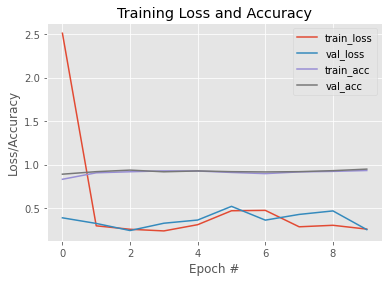

In [21]:
# plot the training loss and accuracy
N = np.arange(0, epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

3 [3]


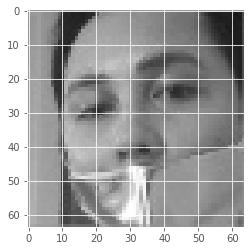

In [22]:
i = random.randint(0,x_test.shape[0])
plt.imshow(x_test[i])
print(np.argmax(prediction[i]),y_test[i])